# Visualize imp wts pattern across rounds

In [10]:
import pickle
imp_wts = pickle.load(open("Save/Imp_weights/imp_wts_idxs_exper25K_2per.p", "rb"))
type(imp_wts[0])

list

In [12]:
import torch
import resnet
import numpy as np

model = resnet.ResNet18()
filename = "exper25K_1per_aug" #"exper25K_2per" #
rd = 14
model.load_state_dict(torch.load("./Save/Models/"+ filename +"/model_" +  str(rd) + ".pt"))

# print(len(imp_wts[0][0])) # = number of imp wts in round 0 and layer 0

frac_imp = {l: [] for l in range(len(imp_wts[0]))}
for layer_num, param in enumerate(model.parameters()):
    frac_imp[layer_num] = [len(imp_wts[rd][layer_num]) / np.prod(param.shape) for rd in range(len(imp_wts))]


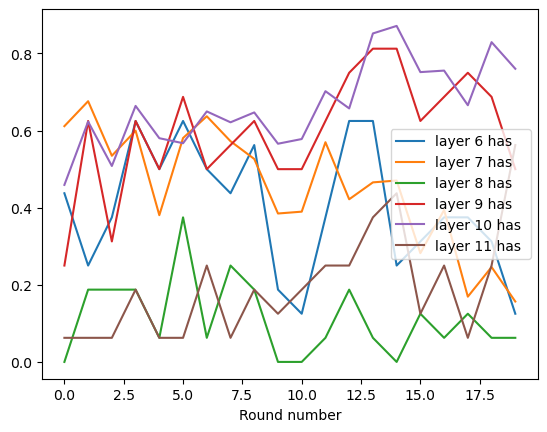

In [9]:
import matplotlib.pyplot as plt

i = 0
for frac in frac_imp.values():
    i += 1
    if i > 5:
        plt.plot(frac, label=F'layer {i} has ')
    else:
        continue
    if i > 10: 
        break

plt.legend()
plt.xlabel('Round number')
plt.show()

In [28]:
np.std(frac_imp[8])

0.16276687487187175

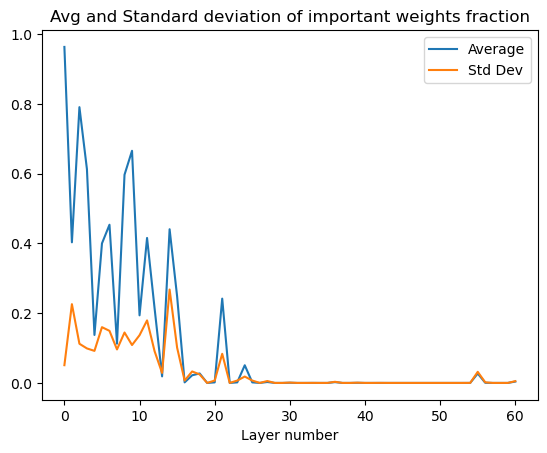

In [13]:
plt.plot([np.average(frac_imp[l]) for l in range(61)], label='Average')
plt.plot([np.std(frac_imp[l]) for l in range(61)], label='Std Dev')
plt.xlabel('Layer number')
plt.title('Avg and Standard deviation of important weights fraction')
plt.legend()
plt.show()

## Minibatch class composition

In [18]:
queried_idxs = pickle.load(open("Save/Queried_idxs/" + "queried_idxs_" + filename + ".p", "rb"))
print(len(queried_idxs), type(queried_idxs[0]))
dataset = pickle.load(open("Save/Queried_idxs/" + "dataset_" + filename + ".p", "rb"))
type(dataset)

14 <class 'numpy.ndarray'>


dict

In [25]:
print(queried_idxs[0][:10])
Y_tr = dataset['Y_train']
[Y_tr[idx].item() for idx in queried_idxs[0][:10]]

[    3 20865    33    12 15677 13080    17 13071 20881  7873]


[0, 8, 0, 0, 6, 5, 0, 5, 8, 3]

In [26]:
class_composition = [[Y_tr[idx].item() for idx in rd_idxs] for rd_idxs in queried_idxs]
print(len(class_composition), len(class_composition[0]))


14 1200


In [50]:
for rd in range(14):
    class_rd = [sum(np.array(class_composition[rd]) == cl) for cl in range(10)]
    print(class_rd, sum(class_rd))
# np.array(class_composition[0][:10]) == 0

[50, 50, 50, 750, 50, 50, 50, 50, 50, 50] 1200
[50, 50, 50, 750, 50, 50, 50, 50, 50, 50] 1200
[50, 50, 102, 579, 219, 0, 50, 50, 50, 50] 1200
[86, 50, 269, 334, 211, 50, 50, 50, 50, 50] 1200
[50, 50, 278, 0, 622, 50, 50, 0, 50, 50] 1200
[50, 50, 403, 0, 447, 50, 50, 50, 50, 50] 1200
[50, 50, 117, 0, 765, 68, 50, 50, 0, 50] 1200
[50, 50, 343, 0, 32, 525, 50, 50, 50, 50] 1200
[50, 80, 247, 0, 0, 588, 135, 50, 0, 50] 1200
[50, 240, 208, 0, 0, 552, 0, 50, 50, 50] 1200
[50, 378, 77, 0, 0, 422, 173, 50, 50, 0] 1200
[50, 356, 31, 0, 0, 0, 644, 19, 50, 50] 1200
[50, 274, 127, 0, 0, 0, 649, 50, 50, 0] 1200
[50, 250, 85, 0, 0, 0, 389, 326, 50, 50] 1200


checking class composition for BAIT

In [57]:
def find_class(idx_arr):
    return idx_arr // 2500

bait_qd_idxs = pickle.load(open("Save/Queried_idxs/" + "bait_queried_idxs_exper25K_2per" + ".p", "rb"))
len(bait_qd_idxs)

20

In [58]:
bait_class = [find_class(b) for b in bait_qd_idxs]
for b_class in bait_class:
    b_rd = [sum(b_class == cl) for cl in range(10)]
    print(b_rd, sum(b_rd))

[50, 50, 50, 750, 50, 50, 50, 50, 50, 50] 1200
[50, 50, 50, 750, 50, 50, 50, 50, 50, 50] 1200
[50, 50, 136, 562, 202, 0, 50, 50, 50, 50] 1200
[97, 50, 303, 313, 187, 50, 50, 50, 50, 50] 1200
[50, 50, 246, 36, 618, 50, 50, 0, 50, 50] 1200
[50, 50, 266, 0, 584, 50, 50, 50, 50, 50] 1200
[50, 50, 241, 0, 659, 50, 50, 50, 0, 50] 1200
[50, 50, 343, 0, 43, 514, 50, 50, 50, 50] 1200
[50, 103, 249, 0, 0, 570, 128, 50, 0, 50] 1200
[50, 240, 183, 0, 0, 577, 0, 50, 50, 50] 1200
[50, 427, 28, 0, 0, 430, 165, 50, 50, 0] 1200
[50, 349, 38, 0, 0, 0, 663, 0, 50, 50] 1200
[50, 225, 176, 0, 0, 0, 649, 50, 50, 0] 1200
[50, 250, 85, 0, 0, 0, 393, 322, 50, 50] 1200
[50, 238, 0, 0, 0, 0, 0, 862, 50, 0] 1200
[148, 177, 0, 0, 0, 0, 0, 410, 415, 50] 1200
[276, 0, 0, 0, 0, 0, 0, 273, 651, 0] 1200
[564, 0, 0, 0, 0, 0, 0, 0, 586, 50] 1200
[623, 0, 0, 0, 0, 0, 0, 0, 82, 495] 1200
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1200] 1200


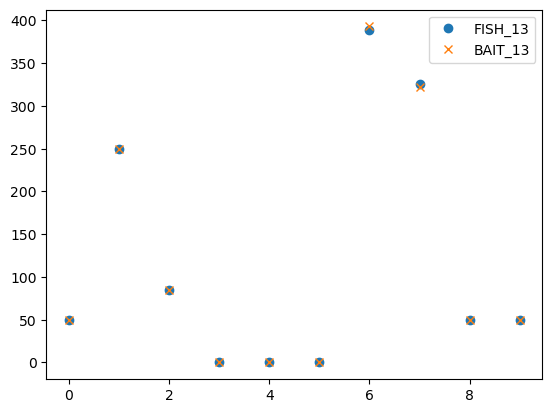

In [65]:
for rd in range(13, 14):
    plt.plot([sum(np.array(class_composition[rd]) == cl) for cl in range(10)], 'o', label=F'FISH_{rd}')
    plt.plot([sum(bait_class[rd] == cl) for cl in range(10)], 'x', label=F'BAIT_{rd}')

plt.legend()
plt.show()

# Debug last-layer important weight selection issue

In [1]:
import torch
# import importlib
# ann = importlib.import_module("active-nn")

import resnet

In [2]:
import numpy as np
import pickle

imp_wts = pickle.load(open("./Save/Imp_weights/imp_wts_idxs_exper25K_1per.p", "rb"))
type(imp_wts) 

list

In [3]:
len(imp_wts)

12

In [4]:
error_rd_imp_wts = imp_wts[-1]
type(error_rd_imp_wts)

list

In [5]:
len(error_rd_imp_wts)

61

In [6]:
model = resnet.ResNet18()
filename = "exper25K_1per"
error_rd = 12
model.load_state_dict(torch.load("./Save/Models/"+ filename +"/model_" +  str(error_rd) + ".pt"))

<All keys matched successfully>

In [7]:
saved_dataset = pickle.load(open("./Save/Queried_idxs/dataset_exper25K_1per.p", "rb"))
type(saved_dataset)

dict

In [8]:
# list(saved_dataset.keys())
X_tr, Y_tr = saved_dataset['X_train'], saved_dataset['Y_train']

In [9]:
idxs_lb = pickle.load(open("./Save/Queried_idxs/queried_idxs_exper25K_1per.p", "rb"))
type(idxs_lb)

list

In [10]:
error_rd_idxs_lb = idxs_lb[-1]
type(error_rd_idxs_lb)

numpy.ndarray

In [11]:
idxs_lb_before_error = []
for idxs in idxs_lb:
    idxs_lb_before_error.extend(idxs)

len(idxs_lb_before_error)

13200

In [12]:
from torchvision import transforms
import dataset as D 
import vgg



handler = D.get_handler("CIFAR10")
args = {'n_epoch': 3, 'transform': transforms.Compose([ 
                        transforms.RandomCrop(32, padding=4),
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                    ]),
                    'loader_tr_args':{'batch_size': 128, 'num_workers': 1},
                    'loader_te_args':{'batch_size': 100, 'num_workers': 1}, # change back to 1000
                    'optimizer_args':{'lr': 0.05, 'momentum': 0.3},
                    'transformTest': transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])}


args['fishIdentity'] = 0
args['fishInit'] = 1
args['lamb'] = 1
args['backwardSteps'] = 0
args['pct_top'] = 0.01
args['savefile'] = "exper25K_1per"


/usr/local/home/sgchr/anaconda3/envs/pyt/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /usr/local/home/sgchr/anaconda3/envs/pyt/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [13]:
# lp_grads = strategy.log_prob_grads_wrt(error_rd_imp_wts)

In [14]:
num_imp_per_layer = [len(t) for t in error_rd_imp_wts]
log_prob_grads = np.zeros((len(Y_tr), len(np.unique(Y_tr)), sum(num_imp_per_layer))) 

In [15]:
from torch.utils.data import DataLoader


masks_list = []
for layer_num, layer_wt in enumerate(list(model.parameters())):
    mask = np.zeros_like(layer_wt.detach().cpu().numpy(), dtype=bool)
    for tup in error_rd_imp_wts[layer_num]:
        mask[tup] = True
    masks_list.append(mask)

model.to('cuda')
for param in model.parameters():
    param.requires_grad = True
model.eval()
parameters = tuple(model.parameters())
    
test_loader = DataLoader(handler(X_tr, Y_tr, transform=args['transform']), shuffle=False, **args['loader_te_args']) # 'transformTest'


In [16]:
import torch.nn.functional as F


for test_batch, test_labels, idxs in test_loader:
    test_batch, test_labels = test_batch.cuda(), test_labels.cuda()
    
    outputs, e1 = model(test_batch)
    _, preds = torch.max(outputs, 1)
    probs = F.softmax(outputs, dim=1).to('cpu')
    log_probs = F.log_softmax(outputs, dim=1)
    N, C = log_probs.shape

    for n in range(N):

        for c in range(C):

            grad_list = torch.autograd.grad(log_probs[n][c], parameters, retain_graph=True) # ~0.007 secs

            
            pos = 0
            for i, grad in enumerate(grad_list):    # different layers # ~0.2 secs ~ 0.003 secs per iteration

                grad = grad.detach().cpu().numpy()  # https://discuss.pytorch.org/t/should-it-really-be-necessary-to-do-var-detach-cpu-numpy/35489
                selected_grads = grad[masks_list[i]]

                log_prob_grads[idxs[n]][c][pos:(pos+len(error_rd_imp_wts[i]))] = selected_grads
                
                pos += len(selected_grads)
            
        
        model.zero_grad()


ValueError: could not broadcast input array from shape (1280,) into shape (1285,)

In [ ]:
len(error_rd_imp_wts[60])

1285

In [ ]:
np.sum(masks_list[-1])

1280

In [18]:
sq_grads = {i: np.random.uniform(size=p.shape) for i, p in enumerate(parameters)}

In [ ]:
sq_grads[60] = 1 + sq_grads[60]

In [ ]:
sq_grads[60][3,4]

1.6184818651513364

In [21]:
def calculate_mask(sq_grads_expect, pct_top=0.02):
    list_t = list(sq_grads_expect.values())
    combined_arrays = np.hstack([t.flatten() for t in sq_grads_expect.values()]) 
    list_lengths = [len(ten.flatten()) for ten in list_t]
    cum_lengths = np.cumsum(list_lengths)
    sorted_idxs = np.argsort(combined_arrays[:cum_lengths[-2]])
    num_top = int(pct_top * len(combined_arrays))
    # top_idxs = sorted_idxs[-num_top:]

    num_last_layer = sum(list_lengths[-1:]) 
    # in FISH ResNet architecture, the last layer has bias=False
    # if last layer has both weight and bias, set -1 to -2 above

    if num_last_layer < num_top:
        top_idxs = np.hstack(
            [sorted_idxs[-(num_top - num_last_layer):], 
            np.arange(cum_lengths[-2], cum_lengths[-1])]
        )
        assert len(top_idxs) == num_top
    else:
        raise ValueError("too small top percentage")

    imp_wt_idxs = [[] for i in range(len(list_t))]
    for idx in top_idxs:
        prev_length = 0
        for idx_layer_num, length in enumerate(cum_lengths):
            if idx < length and length > prev_length: 
                # print(len_idx)
                try:
                    # s_num[len_idx].append(np.where(combined_s[idx] == list_s[len_idx])[0][0])
                    idx_tuple = np.nonzero(combined_arrays[idx] == list_t[idx_layer_num])
                    '''pass only numpy or python objects to numpy functions'''
                    # s_num[len_idx].append([idx[0] for idx in idx_tuple])
                    imp_wt_idxs[idx_layer_num].append(idx_tuple)
                except Exception:
                    print("caught error: ", idx, idx_layer_num, length, imp_wt_idxs)
                    raise
                break
            prev_length = length
    return imp_wt_idxs

test_imp_wts = calculate_mask(sq_grads, 0.01)

In [22]:
len(test_imp_wts[60])

1280

In [23]:
print([len(test_imp_wts[i]) for i in range(len(test_imp_wts))])

[0, 0, 0, 13, 0, 2, 16, 0, 0, 23, 0, 0, 33, 0, 0, 40, 0, 0, 83, 0, 1, 4, 1, 0, 67, 0, 0, 80, 0, 0, 119, 0, 2, 305, 0, 0, 10, 0, 0, 325, 0, 0, 301, 0, 1, 604, 0, 0, 1177, 1, 0, 73, 2, 1, 1204, 2, 1, 1241, 2, 0, 1280]


In [ ]:
a = np.array(([1,2],[2,3],[2,2]))
b = np.array(([2,0],[4,3],[6,2]))

In [ ]:
# c=np.hstack(a)
np.hstack(a,b)

TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given

In [ ]:
1280*2

2560

In [ ]:
sq_grads[60].shape

(10, 128)